In [52]:
import pandas as pd

defender_data = pd.read_csv('data/LRD_data.csv')
defender_data.head()

,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final
0,49990.0,Land Rover Defender 90,90 Hard Top,Gray,0.000000e+00,33,Restored-Modified
1,91500.0,NAS 5-Speed,90 Soft Top,Green,6.300000e+04,28,Original & Highly Original
2,88995.0,5-Speed,110 Hard Top,Blue,1.560010e+10,31,Restored-Modified
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,1.733625e+05,27,Restored-Original
4,112000.0,5-Speed,90 Soft Top,Black,1.030000e+05,29,Restored-Original


Handling some issues with mileage
--- Problems ---
1) Null, 0 vals --> del
2) Scraped and concactenated km + miles --> 15600096934 --> 156k km == 96k miles so change to 96,934 
3) Added decimal val --> 173362.509 should just be 173362 miles

In [53]:
def kmmiles_to_miles(mileage):
    mileage = str(int(mileage))
    m_len = len(mileage)

    if m_len<6:
        raise ValueError("int too small")
    elif m_len==6:
        new_mileage = int(mileage[3:])
    elif m_len==7 or m_len==8:
        new_mileage= int(mileage[4:])
    elif m_len == 9 or m_len==10:
        new_mileage = int(mileage[5:])
    elif m_len==11 or m_len==12:
        new_mileage = int(mileage[6:])
    else:
        raise ValueError("format not recognized")
    return new_mileage

In [54]:
for i, mileage in enumerate(defender_data['mileage_final']):
    if mileage > 500000:  # Handling concatenated km + miles
        try:
            new_mileage = kmmiles_to_miles(mileage)
        except ValueError:
            print(mileage)
        defender_data.at[i, 'mileage_final'] = new_mileage
    elif pd.isna(mileage) or mileage < 100:  
        defender_data.at[i, 'mileage_final'] = None
    else:
        defender_data.at[i, 'mileage_final'] = round(mileage)

defender_data.dropna(subset=['mileage_final'], inplace=True)
defender_data.head()

,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final
1,91500.0,NAS 5-Speed,90 Soft Top,Green,63000.0,28,Original & Highly Original
2,88995.0,5-Speed,110 Hard Top,Blue,96934.0,31,Restored-Modified
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,173363.0,27,Restored-Original
4,112000.0,5-Speed,90 Soft Top,Black,103000.0,29,Restored-Original
6,43995.0,standard,90 Hard Top,White,152000.0,30,Restored-Original


Understanding data distribution

          price_final model_type model_variant_final ext_color_final  \
count      438.000000        438                 438             438   
unique            NaN         73                  12              14   
top               NaN   standard           110 Wagon           White   
freq              NaN         86                 112              93   
mean     68095.114155        NaN                 NaN             NaN   
std      32585.123555        NaN                 NaN             NaN   
min       5000.000000        NaN                 NaN             NaN   
25%      43996.250000        NaN                 NaN             NaN   
50%      62500.000000        NaN                 NaN             NaN   
75%      82000.000000        NaN                 NaN             NaN   
max     269950.000000        NaN                 NaN             NaN   

        mileage_final         age  originality_final  
count      438.000000  438.000000                438  
unique            NaN    

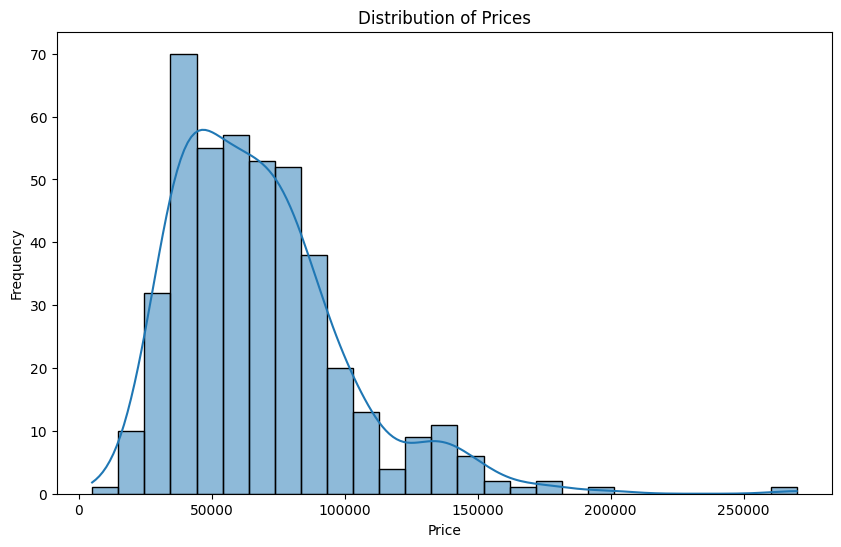

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


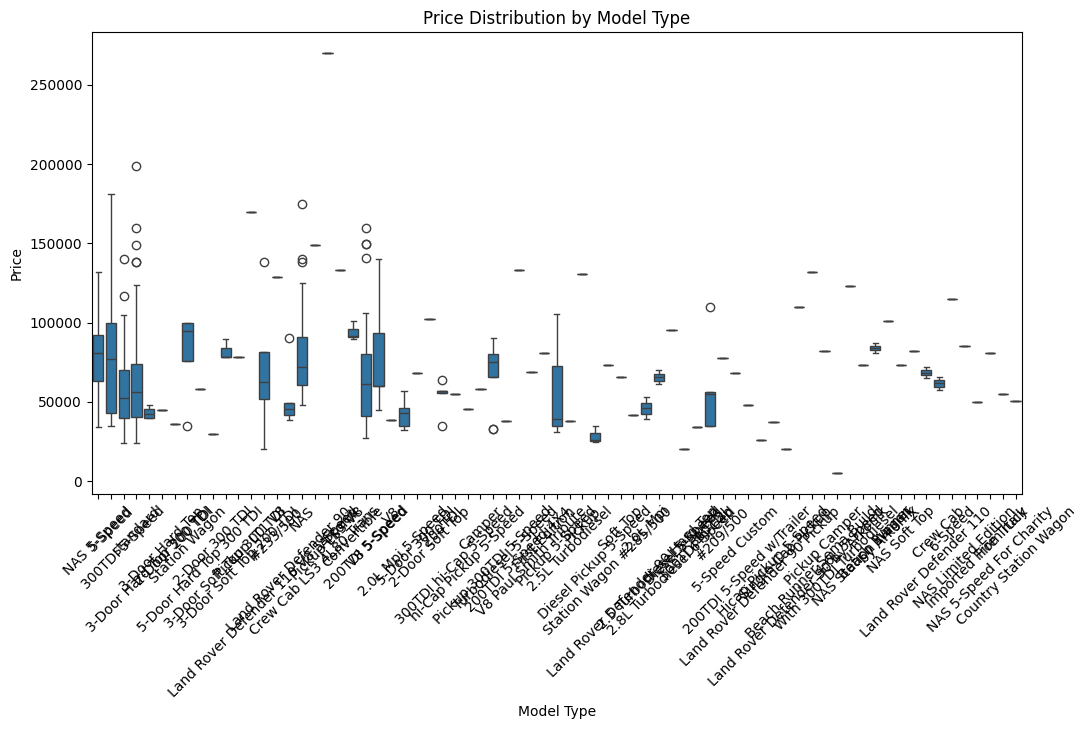

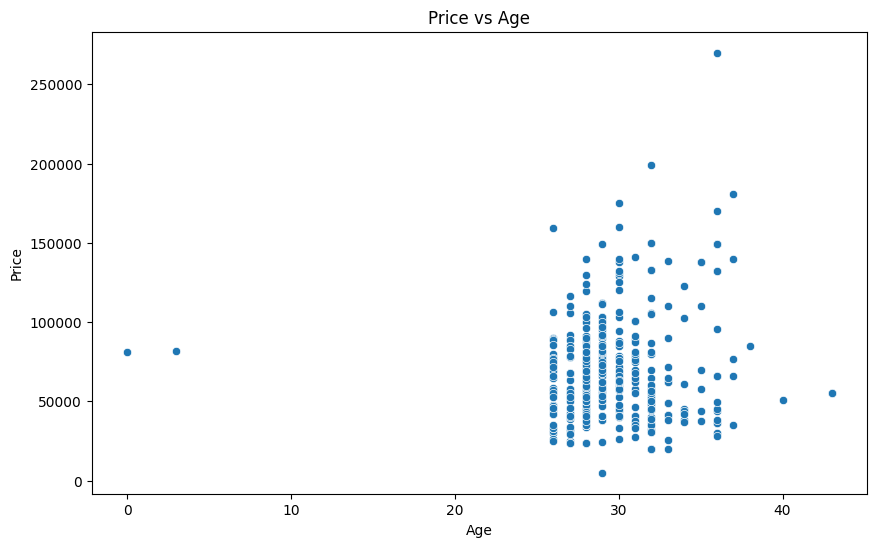

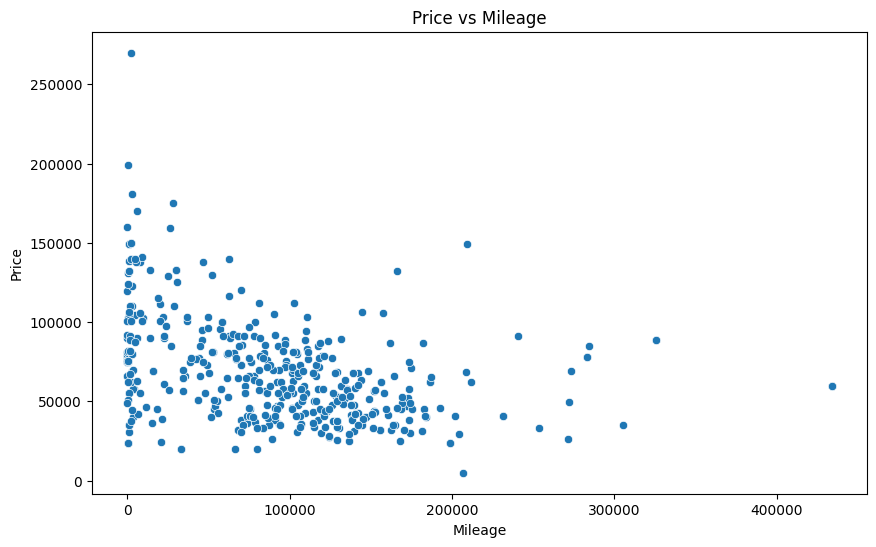

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(defender_data.describe(include='all'))
print(defender_data.info())

# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(defender_data['price_final'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#  model type and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Model Type')
plt.ylabel('Price')
plt.show()

# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price_final', data=defender_data)
plt.title('Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()
# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_final', y='price_final', data=defender_data)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

A couple of notes:

Age) All trucks are at least 25 y/o, doesnt look like theres any relationship between age and price
Price) Somewhat of a normal dist, some outliters at >150,000
Model) Need to standardize model names, too many names that mean the same things

Also, need to remove NAS trucks as I don't care about those.

TODO:

Standardize model names -->
    Remove NAS types -->

In [29]:
print("Unique Model Names Before Standardization:")
print(defender_data['model_type'].unique())

Unique Model Names Before Standardization:
['Land Rover Defender 90' 'NAS 5-Speed' '5-Speed' '300TDI 5-Speed'
 'standard' '3-Door Hard Top 300 TDI' '3-Door Hard Top' '2-Door 200 TDI'
 'Station Wagon' '5-Door Hard Top 300 TDI' '2-Door 300 TDI'
 '3-Door Soft Top 300 TDI' '3-Door Soft Top 200 TDI' 'Pickup LT1 V8'
 'Land Rover Defender 110 V8 5-Speed' '#233/500' 'NAS' '4X4'
 'Crew Cab LS3 4L80 Trans' 'Pickup LS3 V8' 'Arkonik' 'Convertible'
 '200TDI 5-Speed' 'V8 5-Speed' 'V8' '2.0L Mpi 5-Speed' '5-Door 300 TDI'
 '2-Door Soft Top' '200TDI' '300TDI hi-Cap 5-Speed'
 'hi-Cap Pickup 5-Speed' 'Camper' 'NAS Convertible' 'Custom SUV'
 'NAS by Tophat' 'Pickup 300TDI 5-Speed' 'Turbodiesel 5-Speed'
 '200TDI 5-Speed 4X4' 'V8 Paul Smith Tribute' 'First Edition'
 'Pickup 5-Speed' '2.5L Turbodiesel' 'Pickup' 'Diesel Pickup 5-Speed'
 'Station Wagon #285/500' 'Soft Top' 'Land Rover Defender 90 Hard Top'
 'Custom' '2.0L Mpi' '#41/500' '2.5 Turbodiesel 5-Speed'
 '2.8L Turbodiesel 6-Speed' 'Diesel 5-Speed' '30

In [30]:
defender_data['model_type'].value_counts()

model_type
standard                    110
300TDI 5-Speed               69
NAS 5-Speed                  58
200TDI 5-Speed               54
NAS                          31
                           ... 
2-Door 200 TDI                1
#41/500                       1
Pickup LS3 V8                 1
2.8L Turbodiesel 6-Speed      1
Country Station Wagon         1
Name: count, Length: 80, dtype: int64

In [41]:
defender_data['model_variant_final'].value_counts()

model_variant_final
110 Wagon                  112
90 Soft Top                111
90 Hard Top                 98
90 Wagon                    32
110 Hard Top                21
130                         17
110 Soft Top                16
110 Pickup - Single Cab     13
90 Pickup                    9
110 Pickup - Double Cab      6
127                          2
110                          1
Name: count, dtype: int64

In [42]:
def standardize_model(model):
    model = model.strip().lower()
    # gets rid of special models or nas right away
    if 'nas' in model or 'arkonik' in model or 'ls' in model or '#' in model:
        new_model = 'del'
    elif 'v8' in model:
        new_model= 'v8'
    elif '200tdi' in model:
        new_model = '200tdi'
    elif '300tdi' in model:
        new_model = '300tdi'
    elif '2.0' in model:
        new_model = 'gas'
    elif 'td' in model or 'turbodiesel' in model:
        new_model = 'td'
    else:
        new_model = 'standard'
    return new_model

In [46]:
defender_data['model_type_standardized'] = defender_data['model_type'].apply(standardize_model)

,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final,model_type_standardized
2,88995.0,5-Speed,110 Hard Top,Blue,96934.0,31,Restored-Modified,standard
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,173363.0,27,Restored-Original,300tdi
4,112000.0,5-Speed,90 Soft Top,Black,103000.0,29,Restored-Original,standard
6,43995.0,standard,90 Hard Top,White,152000.0,30,Restored-Original,standard
7,39999.0,3-Door Hard Top 300 TDI,90 Hard Top,Green,146786.0,28,Restored-Original,td


In [45]:
defender_data = defender_data[defender_data['model_type_standardized'] != 'del']

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


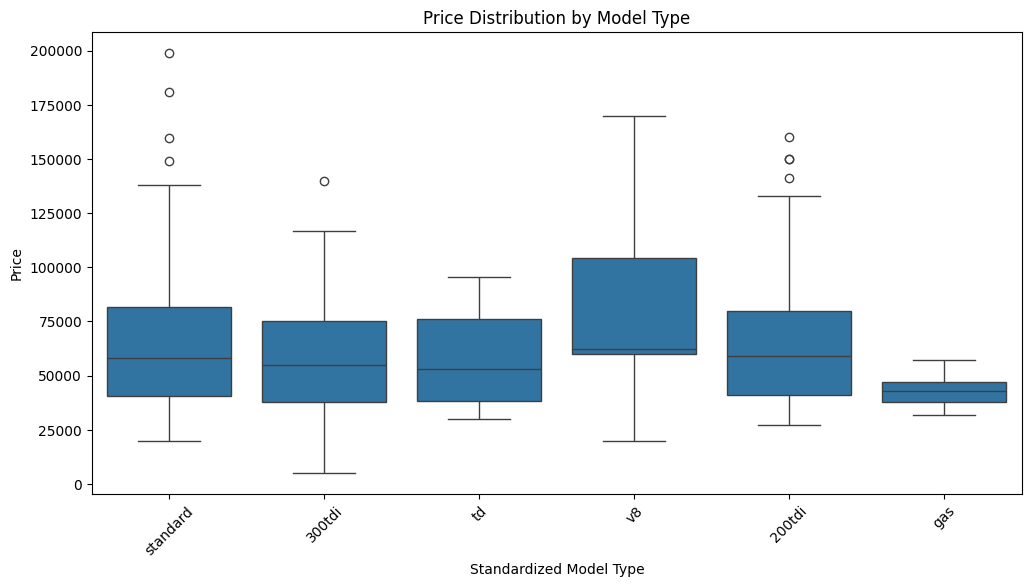

In [48]:
#  now revaluating model type and price relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type_standardized', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Standardized Model Type')
plt.ylabel('Price')
plt.show()

In [58]:
count_1 = (defender_data['mileage_final'] == 1).sum()
count_1

3